<a href="https://colab.research.google.com/github/wijayaeka/Prophet_method_predictive_maintenance/blob/main/Prophet_method_Y2D_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Data yang ada di Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Arahkan pada Folder Project

In [3]:
cd /content/drive/MyDrive/LSTM_Prophet

/content/drive/MyDrive/LSTM_Prophet


Membaca direktori folder project

In [4]:
ls

ANN_Ocupancy.csv  ocupancy_161.csv      Prophet_method_Y2D_data.ipynb
data_raw.csv      Prophet_method.ipynb


**Load Dataset occupancy 161**


Adalah dataset yang memuat historikal occupancy server 161 selama 1 tahun

In [5]:
import pandas as pd
from prophet import Prophet

# Membaca dataset
df = pd.read_csv('data_raw.csv')


**Preparasi Data**

Karena Sebelumnya Kolom Date & Time terpisah, Maka kita buat 1 kolom baru dalam fariable df untuk menyatukan 2 kolom tersebut menjadi **timestamp**

In [6]:
# 2. Encoding kolom kategorikal
# Label Encoding untuk kolom priority, dampak, dan urgency
from sklearn.preprocessing import LabelEncoder

encoder_priority = LabelEncoder()
encoder_dampak = LabelEncoder()
encoder_urgency = LabelEncoder()

df['priority_encoded'] = encoder_priority.fit_transform(df['priority'])
df['dampak_encoded'] = encoder_dampak.fit_transform(df['dampak'].fillna('Unknown'))  # Tangani NaN
df['urgency_encoded'] = encoder_urgency.fit_transform(df['urgency'].fillna('Unknown'))



**Preview Data yang telah di preparasi**

In [7]:
df.info()
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   no                1862 non-null   int64 
 1   ticket_id         1862 non-null   object
 2   rev_ticket_id     1862 non-null   object
 3   tipe              1862 non-null   object
 4   scope             1862 non-null   object
 5   sub_kategori      1862 non-null   object
 6   sumber_gangguan   1862 non-null   object
 7   nama_perangkat    1860 non-null   object
 8   priority          1862 non-null   object
 9   dampak            1783 non-null   object
 10  urgency           1783 non-null   object
 11  create_ticket     1862 non-null   object
 12  assigned_level    1862 non-null   object
 13  priority_encoded  1862 non-null   int64 
 14  dampak_encoded    1862 non-null   int64 
 15  urgency_encoded   1862 non-null   int64 
dtypes: int64(4), object(12)
memory usage: 232.9+ KB
     no     

In [22]:
df

,no,ticket_id,rev_ticket_id,tipe,scope,sub_kategori,sumber_gangguan,nama_perangkat,priority,dampak,urgency,ds,assigned_level,y,dampak_encoded,urgency_encoded
0,2032,INC-01023407802,INC-01023407802,Restoration,Application,ONX,Internal,Facebook,Medium,Medium,Medium,2024-01-01 02:32:45,L1,3,9,50
1,2037,INC-01050707953,INC-01050707953,Restoration,Application,ONX,Internal,Application,Low,Low,Low,2024-01-01 05:59:35,L1,2,8,49
2,2071,INC-02015510062,INC-02023410648,Restoration,Application,ONX,Internal,Reporting,Low,Low,Medium,2024-01-02 13:14:37,L0,2,8,50
3,2100,INC-020843032,INC-020843032,Restoration,Network,ONX,Internal,Application,Medium,Medium,Medium,2024-01-02 09:00:09,L1,3,9,50
4,2105,INC-020922025,INC-020922025,Restoration,Application,ONX,Internal,Application,Low,Medium,Low,2024-01-02 09:27:48,L1,2,9,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,24918,INC-0000024918,INC-0000024918,Restoration,Application,ONX,Internal,Whatsapp,High,High,INC - HIGH,2024-11-30 07:16:47,L1,1,6,46
1858,24920,INC-0000024920,INC-0000024920,Restoration,Application,ONX,Internal,Whatsapp,Low,Low,INC - MEDIUM,2024-11-30 08:13:13,L1,2,8,48
1859,24925,INC-0000024925,INC-0000024925,Restoration,Application,ONX,Internal,Email,Low,Low,INC - LOW,2024-11-30 11:53:50,L1,2,8,47
1860,24948,INC-0000024948,INC-0000024948,Restoration,Application,ONX,Internal,Whatsapp,High,High,INC - HIGH,2024-11-30 12:27:46,L1,1,6,46


**Implementasi Metode Prophet dengan keseluruhan dataset (1 Tahun)**

Training model for priority_encoded...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopo2luf0/ycvzsdf5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopo2luf0/97ktwnog.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17780', 'data', 'file=/tmp/tmpopo2luf0/ycvzsdf5.json', 'init=/tmp/tmpopo2luf0/97ktwnog.json', 'output', 'file=/tmp/tmpopo2luf0/prophet_model4unifro8/prophet_model-20250107053237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:32:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:32:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


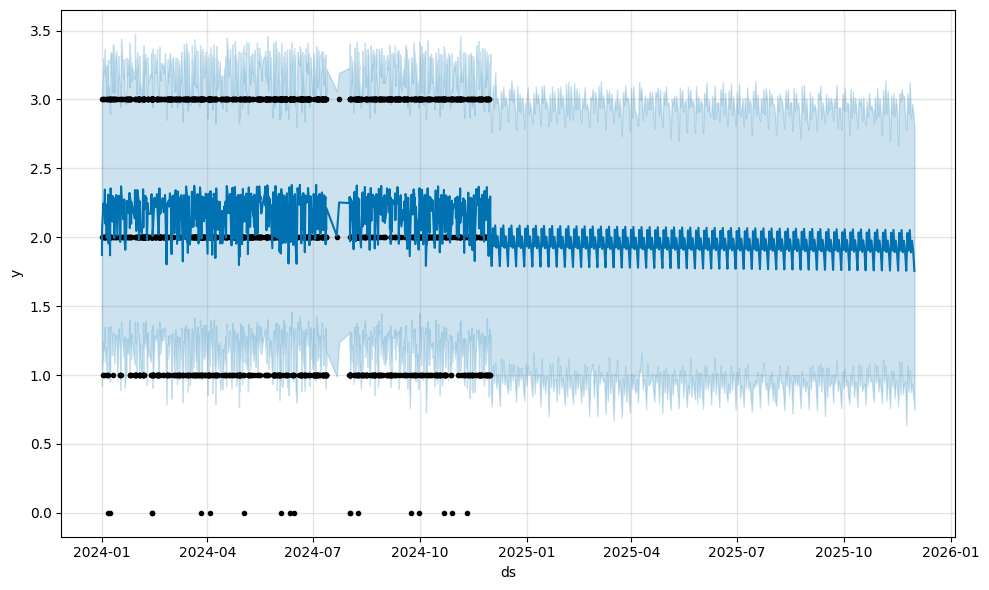

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopo2luf0/69650zgg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopo2luf0/810d6muh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48341', 'data', 'file=/tmp/tmpopo2luf0/69650zgg.json', 'init=/tmp/tmpopo2luf0/810d6muh.json', 'output', 'file=/tmp/tmpopo2luf0/prophet_modellgz7rg7b/prophet_model-20250107053238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:32:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for dampak_encoded...


05:32:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


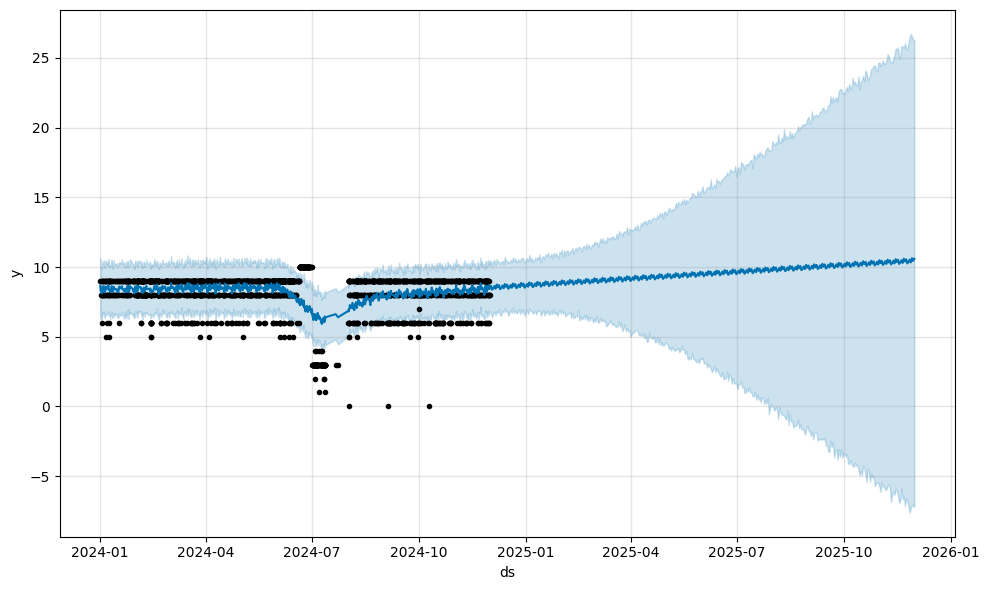

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopo2luf0/rq5kysd4.json


Training model for urgency_encoded...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpopo2luf0/l9a6c0nc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50646', 'data', 'file=/tmp/tmpopo2luf0/rq5kysd4.json', 'init=/tmp/tmpopo2luf0/l9a6c0nc.json', 'output', 'file=/tmp/tmpopo2luf0/prophet_modelvqmjmoor/prophet_model-20250107053239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:32:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:32:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


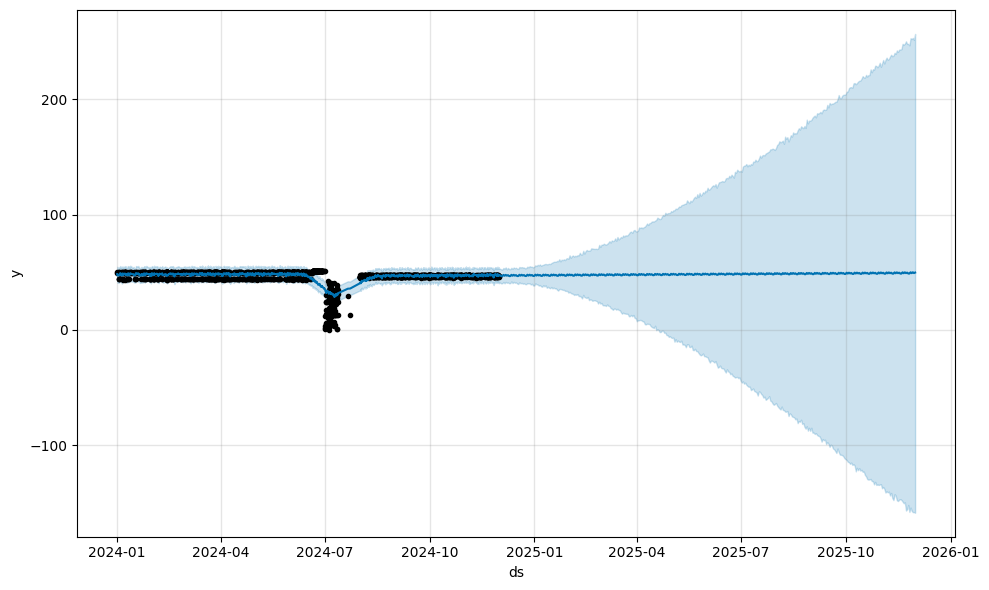

                      ds       yhat  yhat_lower  yhat_upper
2112 2025-11-26 19:32:25  49.953133 -154.208673  253.075796
2113 2025-11-27 19:32:25  49.176899 -157.085313  252.346661
2114 2025-11-28 19:32:25  49.949562 -158.184979  253.327944
2115 2025-11-29 19:32:25  49.257822 -158.124441  251.582065
2116 2025-11-30 19:32:25  49.707362 -158.720474  256.752102


In [8]:
# Import library yang dibutuhkan
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt  # Tambahkan ini untuk plt

# Misalnya data sudah dimuat ke dalam dataframe df
# df = pd.read_csv("file.csv")

# Pastikan kolom timestamp dalam format datetime
df['create_ticket'] = pd.to_datetime(df['create_ticket'])

# Rename kolom untuk masing-masing variabel
columns = ['priority_encoded', 'dampak_encoded', 'urgency_encoded']
models = {}
forecasts = {}

# Iterasi untuk setiap variabel target
for col in columns:
    print(f"Training model for {col}...")
    # Rename kolom untuk Prophet
    df_temp = df.rename(columns={'create_ticket': 'ds', col: 'y'})[['ds', 'y']]

    # Buat dan latih model
    model = Prophet()
    model.fit(df_temp)
    models[col] = model

    # Forecast data
    future = model.make_future_dataframe(periods=365)  # Prediksi 24 jam ke depan
    forecast = model.predict(future)
    forecasts[col] = forecast

    # Plot hasil prediksi
    fig = model.plot(forecast)
    plt.show()  # Menampilkan plot

    # Cetak hasil prediksi terakhir
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


Berikut adalah cara membaca dan menjelaskan plot yang dihasilkan oleh model Prophet berdasarkan gambar:

1. Sumbu X (Waktu)
Representasi waktu dari Januari 2024 hingga Januari 2025.
Data historis berada pada bagian awal plot (hingga mendekati 2024-12), sedangkan data prediksi masa depan ada setelah itu.
2. Sumbu Y (Nilai Target)
Menampilkan nilai variabel target (y). Dalam contoh ini, nilainya berkisar dari 0 hingga sekitar 50.
3. Garis-Garis dalam Plot
Titik Hitam:
Ini adalah data historis yang telah Anda miliki. Titik-titik ini menunjukkan nilai aktual dari variabel target (y) pada setiap waktu (ds).
Garis Biru Tua:
Ini adalah prediksi (yhat) yang dihasilkan oleh model. Prediksi ini dihasilkan berdasarkan pola historis data.
Bayangan Biru Terang (Confidence Interval):
Area ini menunjukkan rentang ketidakpastian (yhat_lower hingga yhat_upper) dari prediksi.
Lebar area menunjukkan tingkat kepercayaan model terhadap prediksi; semakin lebar, semakin besar ketidakpastian.
4. Interpretasi Dataframe (Bagian Teks di Bawah Plot)
Kolom ds: Waktu prediksi.
Kolom yhat: Prediksi utama model untuk nilai target.
Kolom yhat_lower: Batas bawah estimasi prediksi (kemungkinan nilai terendah).
Kolom yhat_upper: Batas atas estimasi prediksi (kemungkinan nilai tertinggi).


Model Prophet secara otomatis menghasilkan tiga grafik untuk memberikan wawasan lebih mendalam tentang data historis dan prediksi. Berikut adalah penjelasan mengenai tiga grafik tersebut:

1. Grafik Utama: Prediksi dengan Confidence Interval
Apa yang ditampilkan?

Grafik utama ini menunjukkan data historis, prediksi masa depan, dan tingkat ketidakpastian (confidence interval).
Komponen utama:
Titik hitam: Data aktual (historis).
Garis biru: Prediksi utama (yhat).
Bayangan biru terang: Confidence interval, yaitu rentang nilai yang memungkinkan berdasarkan perhitungan model (yhat_lower dan yhat_upper).
Kegunaan:

Untuk memahami bagaimana data historis sesuai dengan prediksi.
Memberikan wawasan umum tentang tren dan pola data.
2. Grafik Tren (Trend)
Apa yang ditampilkan?
Grafik ini hanya berfokus pada tren utama dari data historis dan prediksi. Tren ini menunjukkan perubahan rata-rata variabel target (y) dari waktu ke waktu.
Kegunaan:
Mengidentifikasi apakah ada kenaikan atau penurunan secara keseluruhan.
Berguna untuk mendeteksi pola jangka panjang (misalnya, apakah penggunaan CPU meningkat atau menurun selama periode tertentu).
3. Grafik Musiman (Seasonality)
Apa yang ditampilkan?

Grafik ini menunjukkan pola musiman yang ditemukan dalam data.
Musiman harian: Pola yang berulang setiap hari (misalnya, CPU usage tinggi pada jam kerja).
Musiman mingguan: Pola yang berulang setiap minggu (misalnya, lebih banyak aktivitas pada hari kerja daripada akhir pekan).
Musiman tahunan (jika cukup data): Pola yang berulang setiap tahun (misalnya, penurunan penggunaan pada hari libur tertentu).
Kegunaan:

Untuk memahami kapan variabel target mengalami peningkatan atau penurunan secara berkala.
Berguna untuk perencanaan dan prediksi pola spesifik.
Mengapa Prophet Menampilkan Ketiganya?
Prophet dirancang untuk memberikan interpretasi yang mudah dipahami oleh pengguna. Dengan memecah hasil prediksi menjadi komponen seperti tren utama dan musiman, Anda dapat:

Menganalisis data dengan lebih terperinci.
Menemukan pola yang mungkin tersembunyi dalam grafik utama.
Mengambil keputusan berdasarkan pola musiman atau tren yang terdeteksi.


**Percobaan dengan data 30 hari dan prediksi 3 hari kedepan**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopo2luf0/2_ibcusr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopo2luf0/k06xw0y1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87414', 'data', 'file=/tmp/tmpopo2luf0/2_ibcusr.json', 'init=/tmp/tmpopo2luf0/k06xw0y1.json', 'output', 'file=/tmp/tmpopo2luf0/prophet_modelmylaalbg/prophet_model-20250107053440.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:34:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:34:40 - cmdstanpy - INFO - Chain [1] done processing
INF

Processing priority_encoded...


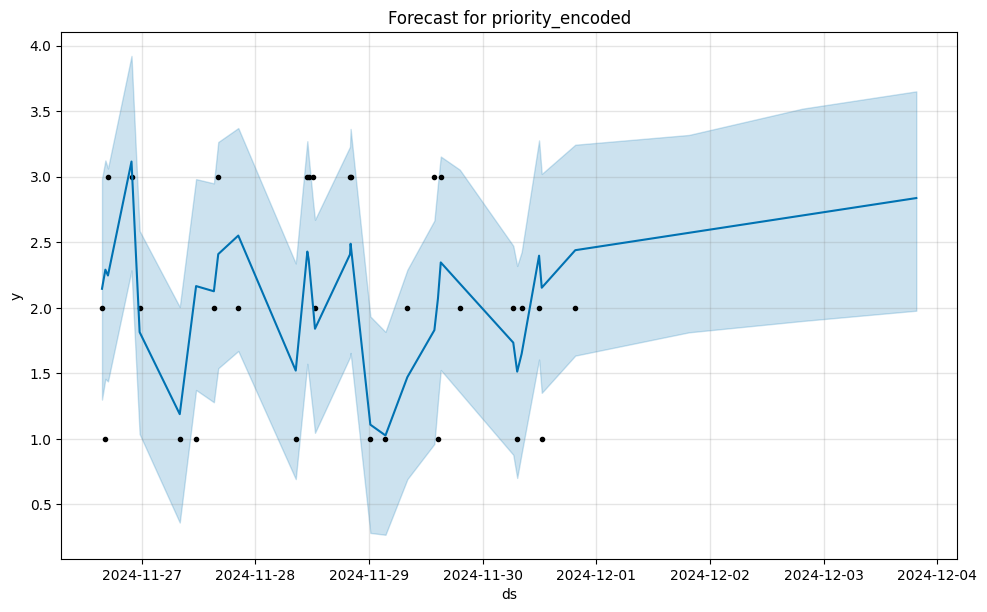

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopo2luf0/f5j0h8us.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopo2luf0/733cmz8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69051', 'data', 'file=/tmp/tmpopo2luf0/f5j0h8us.json', 'init=/tmp/tmpopo2luf0/733cmz8_.json', 'output', 'file=/tmp/tmpopo2luf0/prophet_model01l1gu9n/prophet_model-20250107053441.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:34:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Predictions for priority_encoded:
                     ds      yhat  yhat_lower  yhat_upper
28 2024-11-30 12:27:46  2.152710    1.350862    3.020430
29 2024-11-30 19:32:25  2.438966    1.634852    3.243417
30 2024-12-01 19:32:25  2.571524    1.812364    3.317936
31 2024-12-02 19:32:25  2.704083    1.899105    3.518722
32 2024-12-03 19:32:25  2.836642    1.977411    3.650444
Processing dampak_encoded...


05:34:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


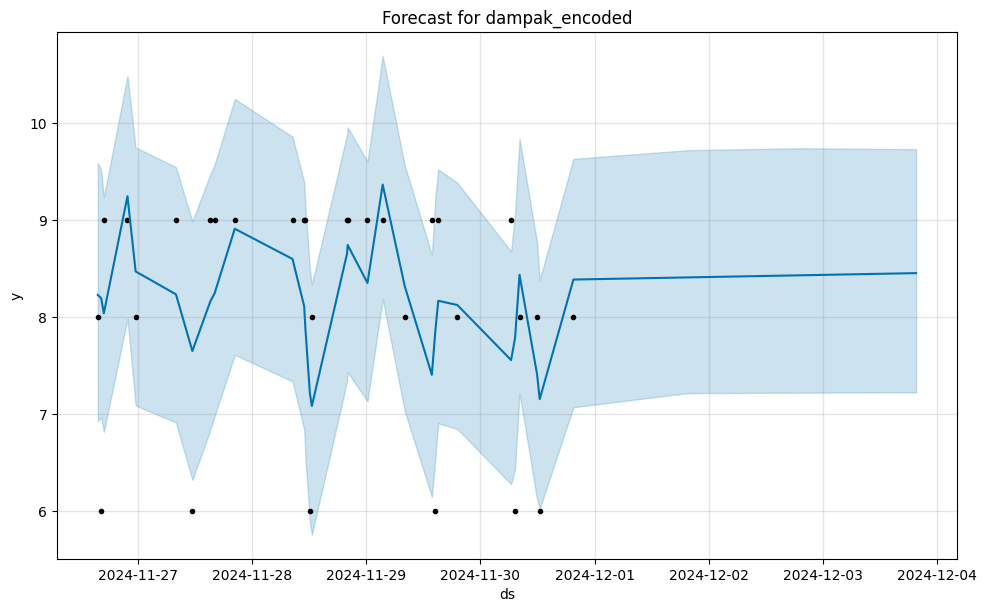

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopo2luf0/49s07rf7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopo2luf0/qmgpj77m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97632', 'data', 'file=/tmp/tmpopo2luf0/49s07rf7.json', 'init=/tmp/tmpopo2luf0/qmgpj77m.json', 'output', 'file=/tmp/tmpopo2luf0/prophet_modelget3vy2a/prophet_model-20250107053442.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:34:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Predictions for dampak_encoded:
                     ds      yhat  yhat_lower  yhat_upper
28 2024-11-30 12:27:46  7.154890    6.024374    8.384291
29 2024-11-30 19:32:25  8.387230    7.071121    9.631556
30 2024-12-01 19:32:25  8.409329    7.216716    9.720682
31 2024-12-02 19:32:25  8.431428    7.221203    9.740931
32 2024-12-03 19:32:25  8.453528    7.224863    9.730919
Processing urgency_encoded...


05:34:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


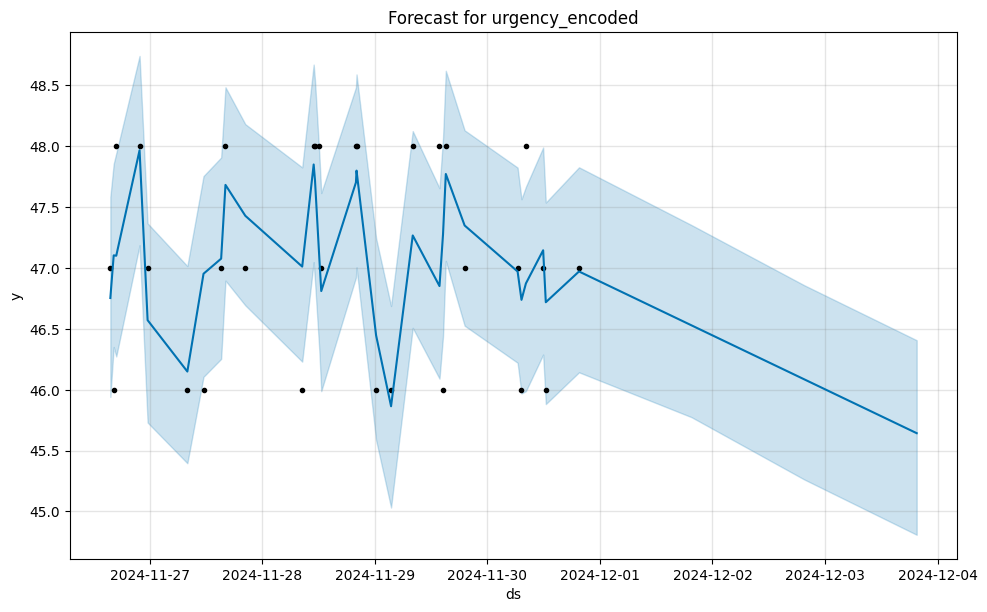

Predictions for urgency_encoded:
                     ds       yhat  yhat_lower  yhat_upper
28 2024-11-30 12:27:46  46.718389   45.881964   47.537381
29 2024-11-30 19:32:25  46.971058   46.142867   47.826653
30 2024-12-01 19:32:25  46.528359   45.774132   47.352147
31 2024-12-02 19:32:25  46.085660   45.263261   46.858590
32 2024-12-03 19:32:25  45.642961   44.808534   46.406498


In [9]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


# Pastikan kolom timestamp dalam format datetime
df['create_ticket'] = pd.to_datetime(df['create_ticket'])

# Kolom yang akan diprediksi
columns = ['priority_encoded', 'dampak_encoded', 'urgency_encoded']

# Dictionary untuk menyimpan model dan hasil prediksi
models = {}
forecasts = {}

# Iterasi untuk setiap kolom yang akan diprediksi
for col in columns:
    print(f"Processing {col}...")

    # Ambil data timestamp dan target
    df_sample = df[['create_ticket', col]].tail(30)  # Ambil 5 data terakhir

    # Format data untuk Prophet
    df_prophet = df_sample.rename(columns={'create_ticket': 'ds', col: 'y'})

    # Inisialisasi dan latih model Prophet
    model = Prophet()
    model.fit(df_prophet)
    models[col] = model

    # Prediksi 3 hari ke depan
    future = model.make_future_dataframe(periods=3)
    forecast = model.predict(future)
    forecasts[col] = forecast

    # Plot hasil prediksi
    fig = model.plot(forecast)
    plt.title(f"Forecast for {col}")
    plt.show()

    # Tampilkan hasil prediksi
    print(f"Predictions for {col}:\n", forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5))


In [14]:
# Rename kolom untuk Prophet (ds = waktu, y = target)
df.rename(columns={'create_ticket': 'ds', 'priority_encoded': 'y'}, inplace=True)

# Pastikan data bersih (hapus baris dengan nilai NaN)
data = df.dropna()

# Split Data (80% untuk training, 20% untuk testing)
train_size = int(0.8 * len(data))  # 80% data
train_data = data.iloc[:train_size]  # Data training
test_data = data.iloc[train_size:]  # Data testing


In [19]:
# Menghapus nilai NaN dari data aktual dan prediksi
valid_data = pd.DataFrame({
    'Date': test_data['ds'].values,
    'Actual': test_actual,
    'Predicted': predicted_values
})

# Hapus baris dengan NaN
valid_data = valid_data.dropna()

# Pisahkan kembali data aktual dan prediksi yang valid
test_actual_clean = valid_data['Actual'].values
predicted_values_clean = valid_data['Predicted'].values


In [21]:
# Hitung metrik evaluasi pada data yang bersih
mae = mean_absolute_error(test_actual_clean, predicted_values_clean)
rmse = np.sqrt(mean_squared_error(test_actual_clean, predicted_values_clean))

# Buat tabel evaluasi
evaluation_table = pd.DataFrame({
    'Date': valid_data['Date'].values,
    'Actual': test_actual_clean,
    'Predicted': predicted_values_clean,
    'Error': test_actual_clean - predicted_values_clean
})

# Tambahkan metrik evaluasi ke tabel
summary_metrics = {
    'Mean Absolute Error (MAE)': [mae],
    'Root Mean Squared Error (RMSE)': [rmse]
}
metrics_table = pd.DataFrame(summary_metrics)

# Output hasil
print("==== Tabel Evaluasi ====")
print(evaluation_table.head())

print("\n==== Metrik Evaluasi ====")
print(metrics_table)


==== Tabel Evaluasi ====
                 Date  Actual  Predicted      Error
0 2024-11-26 15:37:08       2  46.753065 -44.753065
1 2024-11-26 16:20:05       1  47.103441 -46.103441
2 2024-11-26 16:52:44       3  47.100486 -44.100486
3 2024-11-26 21:50:58       3  47.966647 -44.966647
4 2024-11-26 23:33:53       2  46.571061 -44.571061

==== Metrik Evaluasi ====
   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)
0                  45.066635                       45.070337
